In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

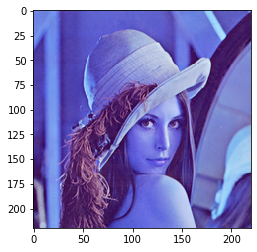

In [4]:
image = cv2.imread('../img/lenna.png')
plt.imshow(image) #ops! the default is BGR

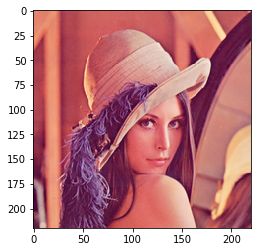

In [76]:
image = cv2.imread('../img/lenna.png')#let's convert to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [77]:
type(image)

numpy.ndarray

In [82]:
image.shape #3 channels..RGB

(220, 220, 3)

In [7]:
#function to show img
def show(img):
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.axis('off') #without axis  
    plt.imshow(img, cmap='Greys')

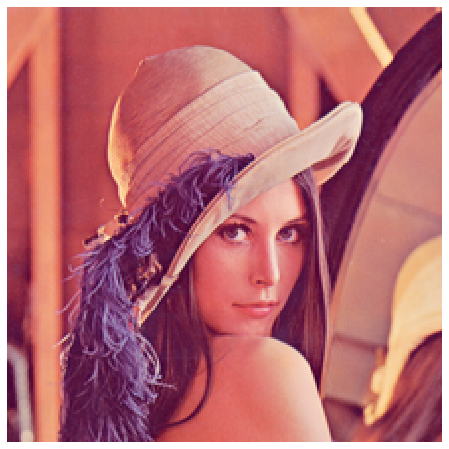

In [71]:
image = cv2.imread('../img/lenna.png')#show img with function
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

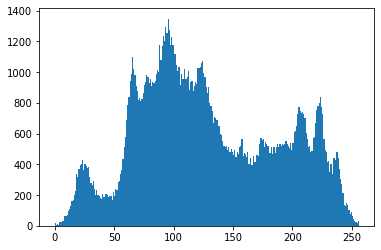

In [72]:
#show histogram
plt.hist(image.ravel(),256,[0,256]); plt.show()

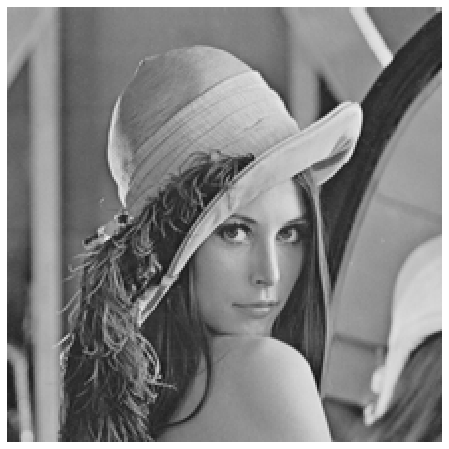

In [74]:
#convert from RGB to Grayscale

image_gray = cv2.imread('../img/lenna.png')

gray = cv2.cvtColor(image_gray, cv2.COLOR_BGR2GRAY)

image_gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)#? its necessary show gray img as RGB

show(image_gray)

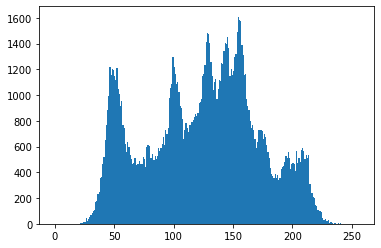

In [75]:
#show histogram
plt.hist(image_gray.ravel(),256,[0,256]); plt.show()

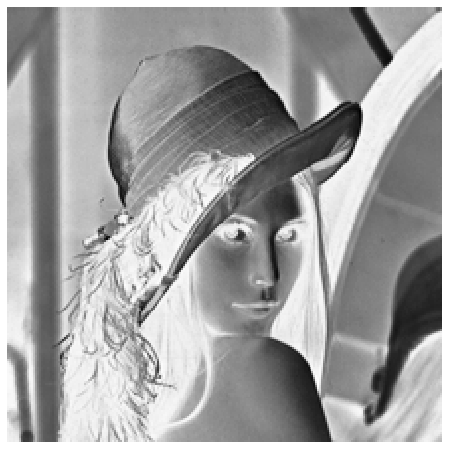

In [15]:
show(gray) #?

In [16]:
#spliting channels of image with .split

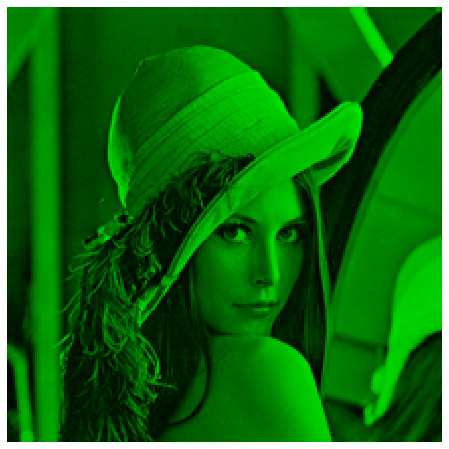

In [33]:
image = cv2.imread('../img/lenna.png')

B, G, R = cv2.split(image) 

image = cv2.merge([B*0, G, R*0])

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

In [35]:
type(B)

numpy.ndarray

In [37]:
B

array([[127, 127, 119, ..., 128, 124, 104],
       [127, 127, 119, ..., 130, 126, 105],
       [122, 118, 117, ..., 106,  96,  80],
       ...,
       [ 60,  61,  63, ...,  68,  73,  73],
       [ 61,  62,  61, ...,  78,  80,  78],
       [ 58,  62,  59, ...,  84,  81,  80]], dtype=uint8)

In [41]:
B + 10

array([[137, 137, 129, ..., 138, 134, 114],
       [137, 137, 129, ..., 140, 136, 115],
       [132, 128, 127, ..., 116, 106,  90],
       ...,
       [ 70,  71,  73, ...,  78,  83,  83],
       [ 71,  72,  71, ...,  88,  90,  88],
       [ 68,  72,  69, ...,  94,  91,  90]], dtype=uint8)

In [ ]:
#Merging channels of image with .merge

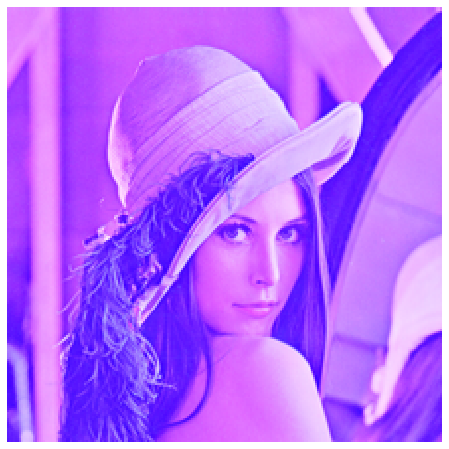

In [43]:
img = cv2.merge([np.ones_like(B)*255, G, R]) #ones_like(B) * 255 results in maximum color for this channel (blue)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img)

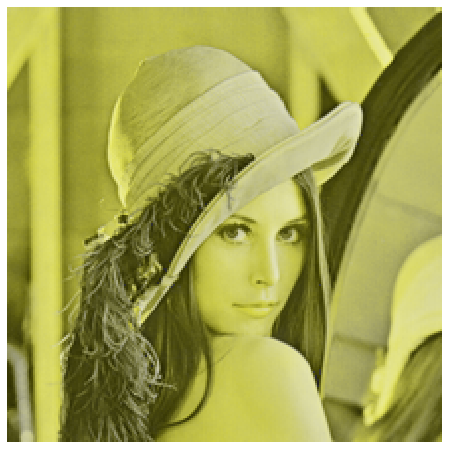

In [47]:
#We can split and merge with other fomats like HSV:

#get image
img = cv2.imread('../img/lenna.png')

#convert from BGR to HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#getting individual channels of image (each 2D array, H,S and V)
H, S, V = cv2.split(img)

#merge individual channels with modified values (after some operations aplied)
img = cv2.merge([np.ones_like(H)*30, S+10, V-20])

#showing as RBG 
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
show(img)

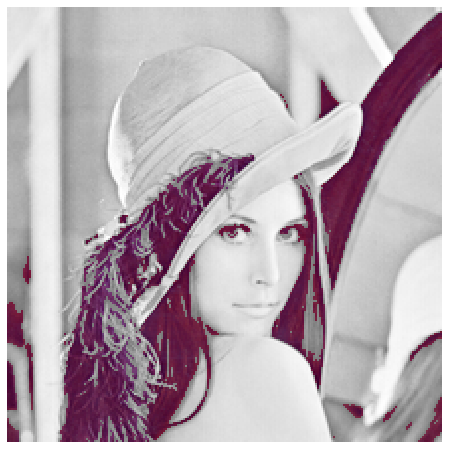

In [68]:
#That in other words: We can filter some colors and make all the rest in grayscale? how it works?

# read img and convert to HSV
img = cv2.imread('../img/lenna.png')
#img = cv2.imread('../img/man_skate.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# split dimensions
H, S, V = cv2.split(img)

# upper and lower boundaries
lower = np.array([0, 0, 0]) 
upper = np.array([255, 255, 120]) #?

# build mask
mask = cv2.inRange(img, lower, upper)

# apply mask to saturation
S = cv2.bitwise_and(S, S, mask=mask)

# assemble image
img = cv2.merge([H, S, V])

# convert to RGB and display
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
show(img)

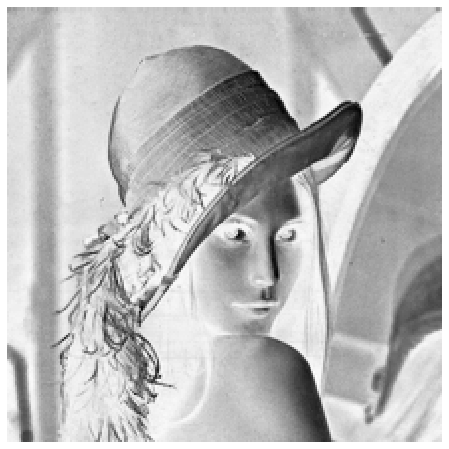

In [69]:
img = cv2.imread('../img/lenna.png')

B, G, R = cv2.split(img) 

show(B)

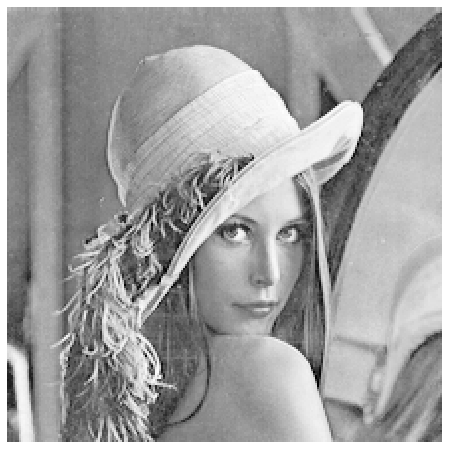

In [70]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img)
show(S)